In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv(r'F:\DATA SCIENCE\Kaggle Datasets\Gender classification\gender_classification_v7.csv')

In [28]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
data.isnull().sum().any()

False

In [74]:
dict_1 = {'Female':1,'Male':0}
data['gender'] = data['gender'].apply(lambda i:dict_1[i])

In [9]:
data.gender.value_counts()

1    2501
0    2500
Name: gender, dtype: int64

<AxesSubplot:xlabel='long_hair', ylabel='count'>

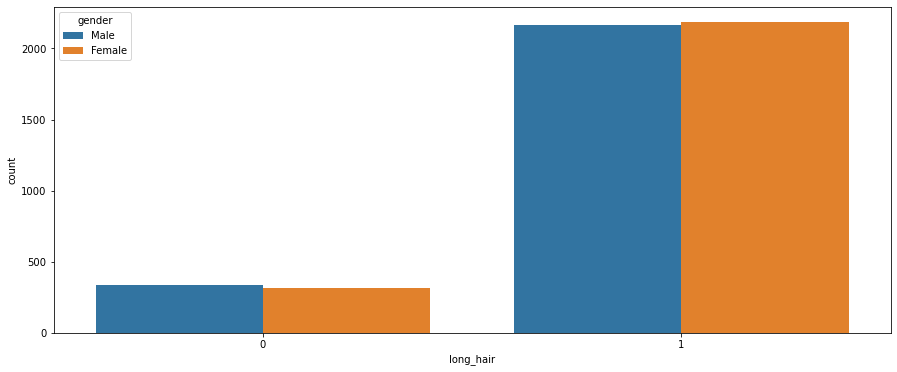

In [29]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'long_hair',hue = 'gender',data = data)

<AxesSubplot:xlabel='forehead_width_cm', ylabel='Count'>

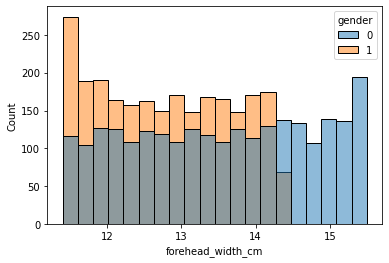

In [15]:
sns.histplot(x = 'forehead_width_cm',hue = 'gender',data = data)

<AxesSubplot:xlabel='forehead_height_cm', ylabel='Count'>

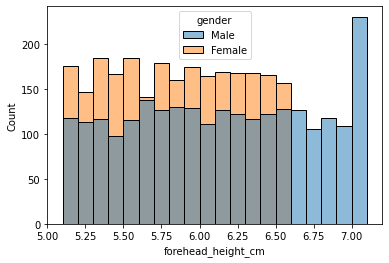

In [30]:
sns.histplot(x = 'forehead_height_cm',hue = 'gender',data = data)

In [76]:
data['forehead_width_height_ratio'] = round(data['forehead_width_cm'] // data['forehead_height_cm'],2)
data.drop(['forehead_width_cm','forehead_height_cm'],axis = 1,inplace = True)
data.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_height_ratio
0,1,1,0,1,1,0,1.0
1,0,0,0,1,0,1,2.0
2,0,1,1,1,1,0,1.0
3,0,0,1,1,1,0,2.0
4,1,0,0,0,0,1,2.0


<AxesSubplot:>

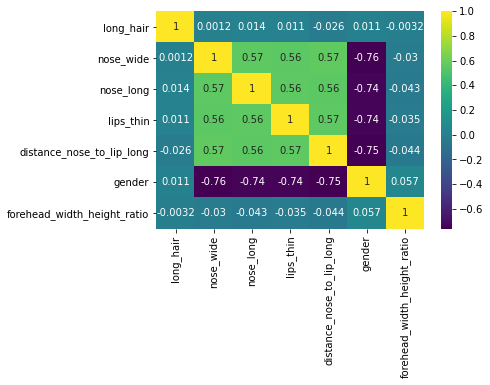

In [83]:
corr = data.corr()
sns.heatmap(corr,annot = True,cmap = 'viridis')

In [78]:
from sklearn.model_selection import train_test_split
X = data.drop('gender',axis = 1)
y = data['gender']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 123)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=123)

In [81]:
from sklearn.metrics import f1_score,accuracy_score
pred = rfc.predict(x_test)
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print('Accuracy:',acc)
print('F1-score:',f1)

Accuracy: 0.9544364508393285
F1-score: 0.9557109557109558


In [99]:
import pickle
pickle_out = open('R_F_Classifier.pkl','wb')
pickle.dump(rfc,pickle_out)
pickle_out.close()

In [90]:
X.head(1)

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,forehead_width_height_ratio
0,1,1,0,1,1,1.0


In [98]:
rfc.predict([[1,1,0,0,1,2]])

array([1], dtype=int64)